<a href="https://colab.research.google.com/github/jiahuili1995/ELEC4630-computer-vision/blob/images/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dlib

install dlib.

In [ ]:
# First store some sample images in the folder 'images'
!mkdir -p images

creat a image folder, input testing and validation images.

In [ ]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 113kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ef1a1d211ff385ea31a6219d3096223e3a3504a3ffbf7988ad493a716b225e1f
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


install face recognition model.

image_0002.jpg
1


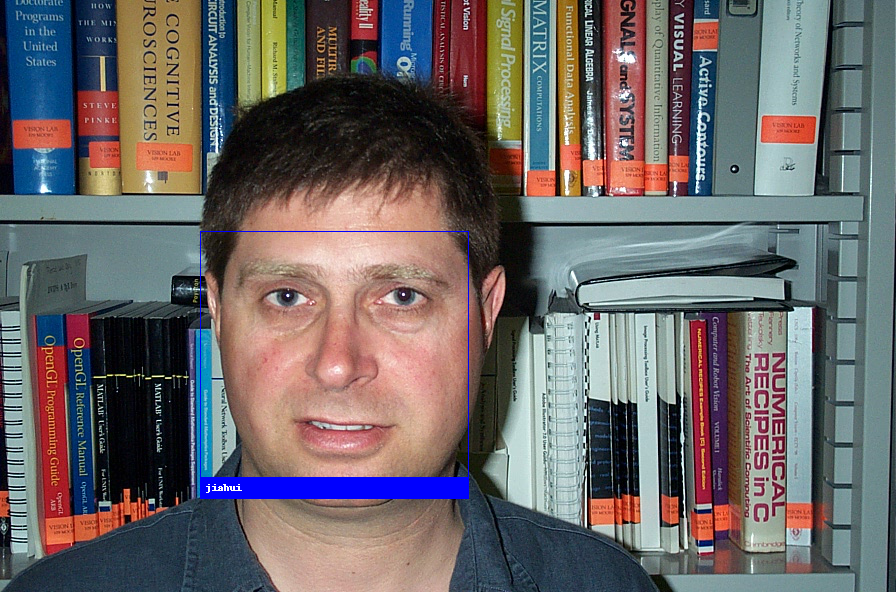

image_0441.jpg
0


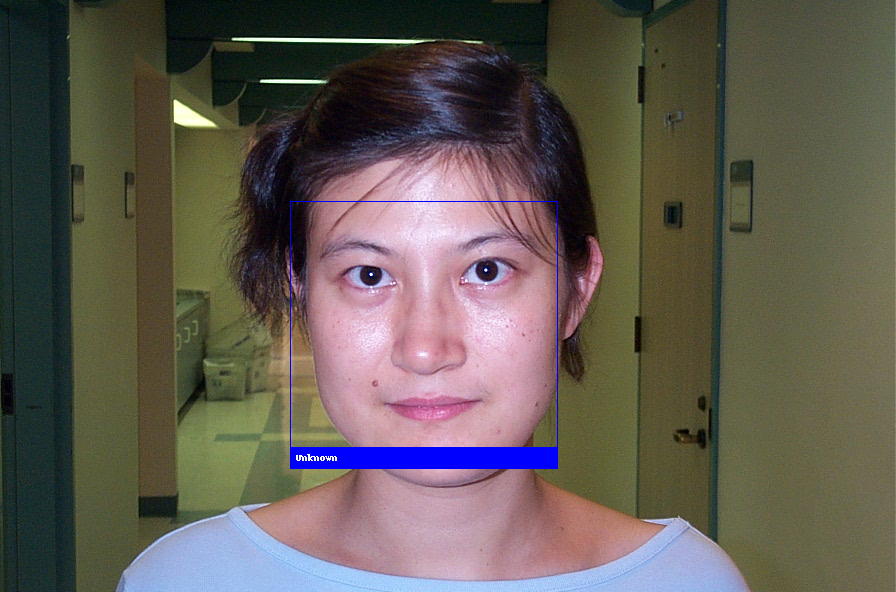

image_0001.jpg
1


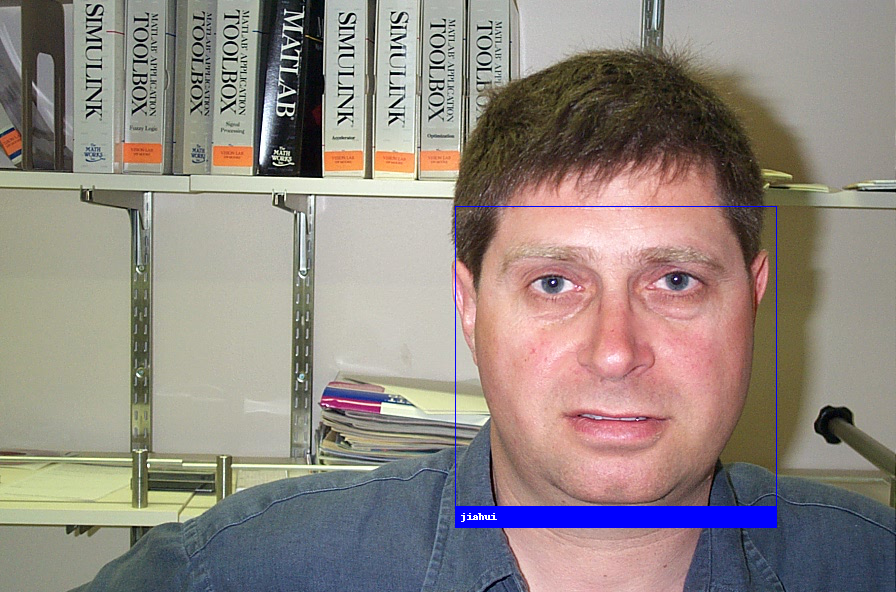

image_0003.jpg
1


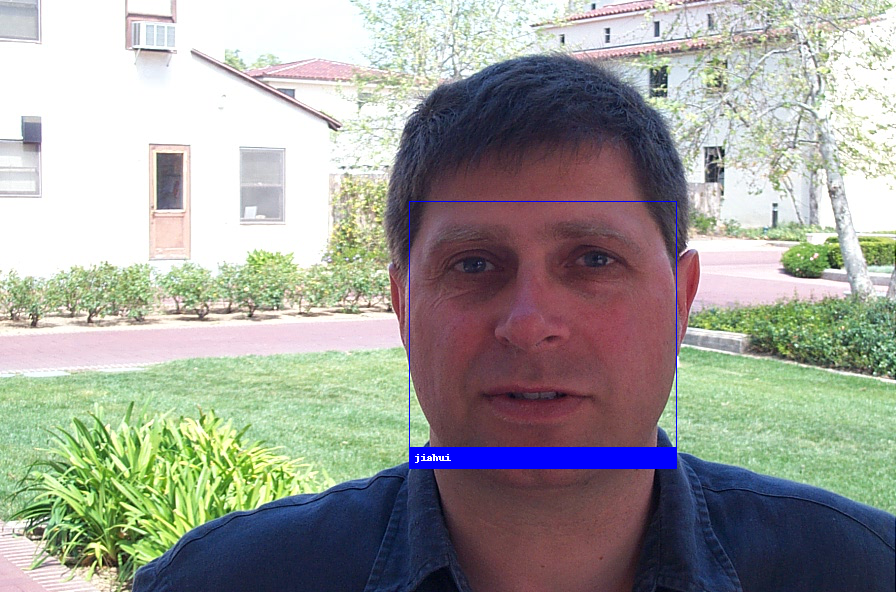

['1', '0', '1', '1']


In [ ]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np
import os

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
passport_image = face_recognition.load_image_file("images/image_0001.jpg")
passport_face_encoding = face_recognition.face_encodings(passport_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
     passport_face_encoding,
]
known_face_names = [
     "jiahui",
]
result_of_match = []
# Load an image with an unknown face
for filename in os.listdir(r'images/'):
    print(filename)
    unknown_image = face_recognition.load_image_file("images/"+filename)

# Find all the faces and face encodings in the unknown image
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
    pil_image = Image.fromarray(unknown_image)

# Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name = "Unknown"

    # use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
           name = known_face_names[best_match_index]
    if name == "jiahui":
       print(1)
       result_of_match.append("1")


    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))
    
    if name == "Unknown":
        print(0)
        result_of_match.append("0")
# Remove the drawing library from memory as per the Pillow docs
    del draw

# Display the resulting image
# pil_image.show()  does not work in iPython
    display(pil_image)
print(result_of_match)
